# T2E5: Project Scheduling

In [2]:
# First, as usual, some imports
import numpy as np
import cvxpy as cp
# this time, we also include matplolib pyplot for plotting
import matplotlib.pyplot as plt

In project scheduling we are given a project graph as displayed below. Each node $i\in \mathcal V=\{1,\ldots, n\}$ in the graph represents a task, and each arc $(i,j)\in \mathcal{E} \subset \mathcal{V} \times \mathcal{V}$ represents a precedence relation: an arc from $i$ to $j$ means that task $j$ can only be initiated once task $i$ is completed. The task durations are denoted by $\lbrace d_i \rbrace_{i=1}^n$.
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Lih4PrkbgqiY90sVRfnwOs1AG6_otDO5">
</p>
The objective is to minimize the completion time of the project (i.e., the completion time of task $n$). This problem can be reformulated as a linear program of the form

$$
\begin{array}{cll}
 	\min & s_n + d_n & \\
 	\text{s.t.} & s_i \geq 0 & \forall i \in \lbrace 1,2,\ldots,n \rbrace \\
 	 & s_v \geq s_u + d_u & \forall (u,v) \in \mathcal{E},
\end{array}
$$
<br>
where the decision variable $s_i$ represents the start time of task $i$, while $\boldsymbol{s}=(s_1,\ldots, s_n)$ is referred to as the project schedule. When implementing project scheduling problems, it is convenient (but not necessary) to represent the project graph by an adjacency matrix $\boldsymbol{A}\in \{0,1\}^{n\times n}$ and the task durations by a vector $\boldsymbol{d}=\lbrace d_1,\ldots, d_n\rbrace^\top\in\mathbb R^n$. In the example of the Figure just above, we set
<br>
$$
	\boldsymbol{A} = \left[ \begin{array}{cccccc}
						 		0 & 1 & 0 & 1 & 0 & 0 \\
                        		0 & 0 & 1 & 0 & 1 & 0 \\
                        		0 & 0 & 0 & 0 & 0 & 1 \\
                        		0 & 0 & 0 & 0 & 1 & 0 \\
                        		0 & 0 & 0 & 0 & 0 & 1 \\
                        		0 & 0 & 0 & 0 & 0 & 0
	              		 \end{array} \right]~\text{and}~
	\boldsymbol{d}=   \left[ \begin{array}{c}
						 		4 \\ 5 \\ 6 \\ 1 \\ 8 \\ 5
	    				 \end{array} \right],
$$
<br>
where $A_{ij}=1$ if $(i,j)\in\mathcal E$ and $A_{ij}=0$ if $(i,j)\notin\mathcal E$.

## 1) Solving the Problem
Implement and solve a linear program that finds the optimal schedule for the project given by $\boldsymbol{A}$ and $\boldsymbol{d}$.<br>
We define $\boldsymbol{A}$ and $\boldsymbol{d}$ as numpy arrays for your conviencience.

In [4]:
A = np.array([[0, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0]])

d = np.array([4, 5, 6, 1, 8, 5])

Now, define the variable, objective and constraints just like we did in the tutorial: <br>
*Hint: You can define the constraints either by writing them out yourself, or by looping over the adjacency matrix and `.append` the constraint to the list of constraints if the adjacency entry is 1*

In [5]:
# define the decision variables
s = cp.Variable(6)
# define the objective
objective = cp.Minimize(s[5]+d[5])

In [6]:
# define the constraints
# smart way: use list.append
constraints = [s>=0]
for u in range(6):
    for v in range(6):
        if A[u,v]:
            constraints.append(s[v]>=s[u]+d[u])

In [7]:
# simple way, just write everything out
constraints2 = [
    s >= 0,
    s[1] >= s[0] + d[0],
    s[3] >= s[0] + d[0],
    s[2] >= s[1] + d[1],
    s[4] >= s[1] + d[1],
    s[5] >= s[2] + d[2],
    s[4] >= s[3] + d[3],
    s[5] >= s[4] + d[4],
]

You are ready to solve the problem. Display the earliest you can finish (optimal value) and start times of all your tasks.

In [8]:
problem = cp.Problem(objective, constraints)

In [9]:
problem.solve()

22.00000001184628

In [10]:
s.value

array([5.28322267e-10, 4.00000000e+00, 9.80682416e+00, 5.98211635e+00,
       9.00000001e+00, 1.70000000e+01])

Below, we define a function you can use for plotting the processes. You can call it as `plot_process(start_times, durations)`

In [11]:
def plot_process(start_times, durations):
    plt.bar(list(range(len(start_times))), start_times.flatten()+durations.flatten())
    plt.bar(list(range(len(start_times))), start_times.flatten(),color='white')
    plt.xlabel('Task ID')
    plt.ylabel('Time')
    plt.title('Task Plan')

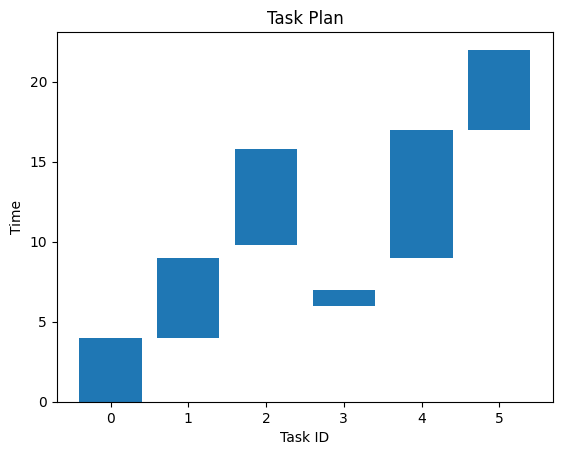

In [12]:
plot_process(s.value, d)

## 2) Adding a loop
Now, add an edge (0,1) to $\mathcal{E}$. This creates a loop inside the depency. What happens? Why?

Hint: Just change the constraints, you can copy the majority of your code from above.

In [13]:
A = np.array([[0, 1, 0, 1, 0, 0],
              [1, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0]])

d = np.array([4, 5, 6, 1, 8, 5])

In [14]:
# define the decision variables
s = cp.Variable(6)
# define the objective
objective = cp.Minimize(s[5]+d[5])

In [15]:
# define the constraints
# smart way: use list.append
constraints = [s>=0]
for u in range(6):
    for v in range(6):
        if A[u,v]:
            constraints.append(s[v]>=s[u]+d[u])

In [16]:
problem = cp.Problem(objective, constraints)

In [17]:
problem.solve()

inf

An infinite objective Value signifies infeasibility

## 3) Loading Data for a larger Project
Consider now a larger project. The data of this problem ($\boldsymbol{A}$ and $\boldsymbol{d}$) is provided in the file `Data.zip`. Implement and solve the linear program that finds the optimal schedule for this project.
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=12t9OXVqdiJHEt9fnTNj66m9_XH2NxDeY">
</p>
Today, we will load the data for you, later you have to do this on your own:

In [18]:
A = np.loadtxt('A.csv', delimiter=',')
d = np.expand_dims(np.loadtxt('d.csv', delimiter=','), 1)

In [22]:
# define the decision variables
n = len(d)
s = cp.Variable(n)
# define the objective
objective = cp.Minimize(s[n-1]+d[n-1])

In [23]:
# define the constraints
# smart way: use list.append
constraints = [s>=0]
for u in range(n):
    for v in range(n):
        if A[u,v]:
            constraints.append(s[v]>=s[u]+d[u])

In [24]:
problem = cp.Problem(objective, constraints)

In [25]:
problem.solve()

45.00000010273833

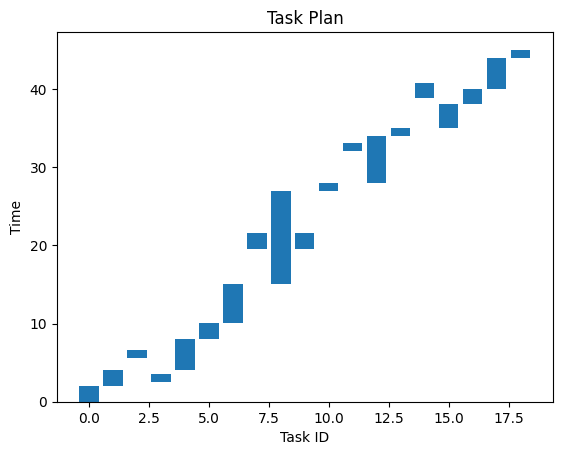

In [26]:
plot_process(s.value, d)